In [76]:
# import required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow

In [77]:
cd D:\Eye Disease\archive

D:\Eye Disease\archive


In [78]:
# load dataset
df = pd.read_csv("full_df.csv")
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [79]:
df['Left-Diagnostic Keywords'].unique()

array(['cataract', 'normal fundus',
       'laser spot，moderate non proliferative retinopathy',
       'macular epiretinal membrane',
       'moderate non proliferative retinopathy', 'drusen',
       'epiretinal membrane',
       'moderate non proliferative retinopathy，hypertensive retinopathy',
       'pathological myopia', 'mild nonproliferative retinopathy',
       'hypertensive retinopathy',
       'macular epiretinal membrane，mild nonproliferative retinopathy',
       'macular hole', 'wet age-related macular degeneration',
       'moderate non proliferative retinopathy，laser spot',
       'moderate non proliferative retinopathy，myelinated nerve fibers',
       'dry age-related macular degeneration',
       'epiretinal membrane，myelinated nerve fibers',
       'diabetic retinopathy', 'epiretinal membrane，lens dust', 'atrophy',
       'laser spot，white vessel，moderate non proliferative retinopathy',
       'chorioretinal atrophy',
       'moderate non proliferative retinopathy，catar

In [80]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [81]:
df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

In [82]:
def has_glaucoma(text):
    if "glaucoma" in text:
        return 1
    else:
        return 0

In [83]:
df["left_glaucoma"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_glaucoma(x))
df["right_glaucoma"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_glaucoma(x))

In [84]:
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,M,O,filepath,labels,target,filename,left_cataract,right_cataract,left_glaucoma,right_glaucoma
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,1,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,0,0,0,0
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,...,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,0,0,0,0
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,0,0,0,0


In [85]:
df['C'].value_counts()

0    5990
1     402
Name: C, dtype: int64

In [86]:
df.left_glaucoma.value_counts()

0    6060
1     332
Name: left_glaucoma, dtype: int64

In [87]:
df.right_glaucoma.value_counts()

0    6108
1     284
Name: right_glaucoma, dtype: int64

In [88]:
left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values
left_cataract[:15]

array(['0_left.jpg', '81_left.jpg', '103_left.jpg', '119_left.jpg',
       '254_left.jpg', '294_left.jpg', '330_left.jpg', '448_left.jpg',
       '465_left.jpg', '477_left.jpg', '553_left.jpg', '560_left.jpg',
       '594_left.jpg', '611_left.jpg', '625_left.jpg'], dtype=object)

In [89]:
right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values
right_cataract[:15]

array(['24_right.jpg', '81_right.jpg', '112_right.jpg', '188_right.jpg',
       '218_right.jpg', '345_right.jpg', '354_right.jpg', '477_right.jpg',
       '553_right.jpg', '560_right.jpg', '625_right.jpg', '726_right.jpg',
       '769_right.jpg', '949_right.jpg', '955_right.jpg'], dtype=object)

In [90]:
left_glaucoma = df.loc[(df.G ==1) & (df.left_glaucoma == 1)]["Left-Fundus"].values
left_glaucoma[:15]

array(['95_left.jpg', '153_left.jpg', '167_left.jpg', '178_left.jpg',
       '247_left.jpg', '365_left.jpg', '583_left.jpg', '625_left.jpg',
       '746_left.jpg', '931_left.jpg', '1209_left.jpg', '1210_left.jpg',
       '1211_left.jpg', '1212_left.jpg', '1213_left.jpg'], dtype=object)

In [91]:
right_glaucoma = df.loc[(df.G ==1) & (df.right_glaucoma == 1)]["Left-Fundus"].values
right_glaucoma[:15]

array(['43_left.jpg', '167_left.jpg', '238_left.jpg', '247_left.jpg',
       '365_left.jpg', '583_left.jpg', '746_left.jpg', '931_left.jpg',
       '1209_left.jpg', '1210_left.jpg', '1211_left.jpg', '1212_left.jpg',
       '1213_left.jpg', '1214_left.jpg', '1215_left.jpg'], dtype=object)

In [92]:
print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

Number of images in left cataract: 304
Number of images in right cataract: 290


In [93]:
print("Number of images in left cataract: {}".format(len(left_glaucoma)))
print("Number of images in right cataract: {}".format(len(right_glaucoma)))

Number of images in left cataract: 332
Number of images in right cataract: 284


In [94]:
left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
right_normal[:15]

array(['2964_right.jpg', '680_right.jpg', '500_right.jpg',
       '2368_right.jpg', '2820_right.jpg', '2769_right.jpg',
       '2696_right.jpg', '2890_right.jpg', '940_right.jpg',
       '2553_right.jpg', '3371_right.jpg', '3042_right.jpg',
       '919_right.jpg', '3427_right.jpg', '379_right.jpg'], dtype=object)

In [95]:
cataract = np.concatenate((left_cataract,right_cataract),axis=0)
glaucoma = np.concatenate((left_glaucoma,right_glaucoma),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)

In [96]:
normal

array(['3332_left.jpg', '4059_left.jpg', '69_left.jpg', '2415_left.jpg',
       '4176_left.jpg', '2711_left.jpg', '4614_left.jpg', '3174_left.jpg',
       '2862_left.jpg', '2424_left.jpg', '3193_left.jpg', '3306_left.jpg',
       '2961_left.jpg', '2425_left.jpg', '2858_left.jpg', '3180_left.jpg',
       '2668_left.jpg', '2659_left.jpg', '2336_left.jpg', '277_left.jpg',
       '2897_left.jpg', '1151_left.jpg', '3011_left.jpg', '3083_left.jpg',
       '4059_left.jpg', '4576_left.jpg', '2563_left.jpg', '2549_left.jpg',
       '3025_left.jpg', '2330_left.jpg', '2562_left.jpg', '3438_left.jpg',
       '3047_left.jpg', '3150_left.jpg', '570_left.jpg', '2430_left.jpg',
       '2532_left.jpg', '3426_left.jpg', '2475_left.jpg', '3214_left.jpg',
       '1253_left.jpg', '2819_left.jpg', '3415_left.jpg', '2973_left.jpg',
       '2488_left.jpg', '2349_left.jpg', '3025_left.jpg', '3125_left.jpg',
       '160_left.jpg', '2999_left.jpg', '2886_left.jpg', '3179_left.jpg',
       '1021_left.jpg', '3410_

In [97]:
cataract

array(['0_left.jpg', '81_left.jpg', '103_left.jpg', '119_left.jpg',
       '254_left.jpg', '294_left.jpg', '330_left.jpg', '448_left.jpg',
       '465_left.jpg', '477_left.jpg', '553_left.jpg', '560_left.jpg',
       '594_left.jpg', '611_left.jpg', '625_left.jpg', '629_left.jpg',
       '691_left.jpg', '726_left.jpg', '750_left.jpg', '809_left.jpg',
       '820_left.jpg', '824_left.jpg', '874_left.jpg', '907_left.jpg',
       '970_left.jpg', '999_left.jpg', '1083_left.jpg', '1102_left.jpg',
       '1115_left.jpg', '1144_left.jpg', '1164_left.jpg', '1285_left.jpg',
       '1415_left.jpg', '1435_left.jpg', '1444_left.jpg', '1452_left.jpg',
       '1468_left.jpg', '1483_left.jpg', '1484_left.jpg', '1987_left.jpg',
       '1994_left.jpg', '2052_left.jpg', '2098_left.jpg', '2099_left.jpg',
       '2101_left.jpg', '2102_left.jpg', '2103_left.jpg', '2104_left.jpg',
       '2105_left.jpg', '2108_left.jpg', '2109_left.jpg', '2110_left.jpg',
       '2111_left.jpg', '2113_left.jpg', '2114_left.jp

In [98]:
glaucoma

array(['95_left.jpg', '153_left.jpg', '167_left.jpg', '178_left.jpg',
       '247_left.jpg', '365_left.jpg', '583_left.jpg', '625_left.jpg',
       '746_left.jpg', '931_left.jpg', '1209_left.jpg', '1210_left.jpg',
       '1211_left.jpg', '1212_left.jpg', '1213_left.jpg', '1214_left.jpg',
       '1215_left.jpg', '1216_left.jpg', '1217_left.jpg', '1218_left.jpg',
       '1220_left.jpg', '1221_left.jpg', '1222_left.jpg', '1225_left.jpg',
       '1226_left.jpg', '1227_left.jpg', '1229_left.jpg', '1230_left.jpg',
       '1231_left.jpg', '1232_left.jpg', '1234_left.jpg', '1237_left.jpg',
       '1239_left.jpg', '1241_left.jpg', '1246_left.jpg', '1247_left.jpg',
       '1248_left.jpg', '1250_left.jpg', '1251_left.jpg', '1255_left.jpg',
       '1256_left.jpg', '1258_left.jpg', '1259_left.jpg', '1260_left.jpg',
       '1261_left.jpg', '1264_left.jpg', '1265_left.jpg', '1266_left.jpg',
       '1267_left.jpg', '1268_left.jpg', '1269_left.jpg', '1270_left.jpg',
       '1271_left.jpg', '1272_left.j

In [99]:
print(len(cataract),len(glaucoma),len(normal))

594 616 500


## creating dataset from images

In [100]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import os

dataset_dir = "D:/Eye Disease/archive/preprocessed_images"
image_size=224
labels = []
dataset = []

def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue
        
        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset

In [101]:
dataset = create_dataset(cataract,1)

100%|███████████████████████████████████████████████████████████████████████████████| 594/594 [00:02<00:00, 230.62it/s]


In [102]:
len(dataset)

588

In [103]:
dataset = create_dataset(normal,0)

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 232.50it/s]


In [104]:
len(dataset)

1088

In [105]:
dataset = create_dataset(glaucoma,2)

100%|███████████████████████████████████████████████████████████████████████████████| 616/616 [00:02<00:00, 247.32it/s]


In [106]:
len(dataset)

1695

783
156
1667
1386
824
953
641
1658
947
596


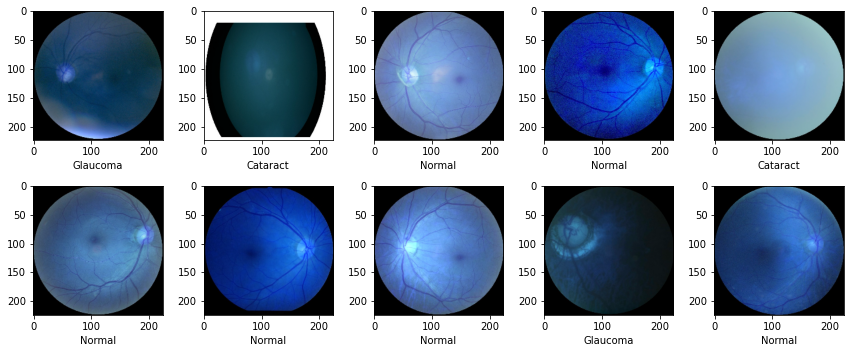

In [107]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    print(sample)
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    elif category==2:
        label = "Glaucoma"
    else:
        label = "Cataract"
    plt.subplot(3,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()

In [109]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [111]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50

InceptionV3 = ResNet50(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

In [112]:
for layer in InceptionV3.layers:
    layer.trainable = False

In [113]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model = Sequential()
model.add(InceptionV3)
model.add(Flatten())
model.add(Dense(3,activation="softmax"))

In [114]:
model2 = Sequential([
    
])

In [115]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 301059    
Total params: 23,888,771
Trainable params: 301,059
Non-trainable params: 23,587,712
_________________________________________________________________


In [116]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [117]:
history = model.fit(x_train,y_train,batch_size=32,epochs=15,validation_data=(x_test,y_test),
                    verbose=1)

Epoch 1/15
43/43 [==============================] - 16s 236ms/step - loss: 6.2661 - accuracy: 0.6637 - val_loss: 3.1359 - val_accuracy: 0.8230
Epoch 2/15
43/43 [==============================] - 8s 182ms/step - loss: 0.8381 - accuracy: 0.9152 - val_loss: 1.4674 - val_accuracy: 0.8702
Epoch 3/15
43/43 [==============================] - 8s 183ms/step - loss: 0.5911 - accuracy: 0.9263 - val_loss: 2.1327 - val_accuracy: 0.8614
Epoch 4/15
43/43 [==============================] - 8s 182ms/step - loss: 0.5560 - accuracy: 0.9531 - val_loss: 1.8821 - val_accuracy: 0.8938
Epoch 5/15
43/43 [==============================] - 8s 183ms/step - loss: 0.2119 - accuracy: 0.9882 - val_loss: 1.4163 - val_accuracy: 0.9174
Epoch 6/15
43/43 [==============================] - 8s 184ms/step - loss: 0.1238 - accuracy: 0.9912 - val_loss: 1.9279 - val_accuracy: 0.8673
Epoch 7/15
43/43 [==============================] - 8s 184ms/step - loss: 0.2349 - accuracy: 0.9876 - val_loss: 1.5654 - val_accuracy: 0.9233
Epoch

In [159]:
# building and train model
with tensorflow.device('/GPU:0'):
    model3 = Sequential([
#     data_augmentation,
    tensorflow.keras.layers.Conv2D(32,(3,3),(1,1),'valid',activation='relu',input_shape=(224,224,3)),
    tensorflow.keras.layers.MaxPooling2D((2,2),strides=2),
    tensorflow.keras.layers.Conv2D(64,(3,3),(1,1),'valid',activation='relu'),
    tensorflow.keras.layers.MaxPooling2D((2,2),strides=2),
    tensorflow.keras.layers.Conv2D(128,(3,3),(1,1),'valid',activation='relu'),
    tensorflow.keras.layers.MaxPooling2D((2,2),strides=2),
    tensorflow.keras.layers.Dropout(0.5),
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(128,activation='relu'),
    tensorflow.keras.layers.Dense(3,activation=tensorflow.nn.softmax)
    ])
    
    # compilation of the model
    model3.compile('adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

    # training of the model
    history = model3.fit(x_train,y_train,epochs=100,verbose=1,validation_data=(x_test,y_test))

Epoch 1/100
43/43 [==============================] - 4s 77ms/step - loss: 102.8283 - accuracy: 0.4012 - val_loss: 0.9593 - val_accuracy: 0.5811
Epoch 2/100
43/43 [==============================] - 3s 74ms/step - loss: 0.9978 - accuracy: 0.5387 - val_loss: 0.9201 - val_accuracy: 0.6106
Epoch 3/100
43/43 [==============================] - 3s 74ms/step - loss: 0.9510 - accuracy: 0.5454 - val_loss: 0.9333 - val_accuracy: 0.5516
Epoch 4/100
43/43 [==============================] - 3s 74ms/step - loss: 0.8735 - accuracy: 0.6166 - val_loss: 0.7607 - val_accuracy: 0.6608
Epoch 5/100
43/43 [==============================] - 3s 74ms/step - loss: 0.7899 - accuracy: 0.6460 - val_loss: 0.6760 - val_accuracy: 0.6962
Epoch 6/100
43/43 [==============================] - 3s 74ms/step - loss: 0.7798 - accuracy: 0.6622 - val_loss: 0.7355 - val_accuracy: 0.6608
Epoch 7/100
43/43 [==============================] - 3s 74ms/step - loss: 0.7371 - accuracy: 0.6681 - val_loss: 0.6580 - val_accuracy: 0.7404
Epoc

43/43 [==============================] - 3s 74ms/step - loss: 0.0627 - accuracy: 0.9787 - val_loss: 0.3966 - val_accuracy: 0.9174
Epoch 59/100
43/43 [==============================] - 3s 74ms/step - loss: 0.0598 - accuracy: 0.9830 - val_loss: 0.4257 - val_accuracy: 0.9145
Epoch 60/100
43/43 [==============================] - 3s 74ms/step - loss: 0.0785 - accuracy: 0.9773 - val_loss: 0.3970 - val_accuracy: 0.8997
Epoch 61/100
43/43 [==============================] - 3s 75ms/step - loss: 0.0449 - accuracy: 0.9883 - val_loss: 0.3740 - val_accuracy: 0.9174
Epoch 62/100
43/43 [==============================] - 3s 74ms/step - loss: 0.0324 - accuracy: 0.9909 - val_loss: 0.4636 - val_accuracy: 0.9174
Epoch 63/100
43/43 [==============================] - 3s 75ms/step - loss: 0.0417 - accuracy: 0.9885 - val_loss: 0.3500 - val_accuracy: 0.9381
Epoch 64/100
43/43 [==============================] - 3s 74ms/step - loss: 0.0550 - accuracy: 0.9795 - val_loss: 0.4763 - val_accuracy: 0.9027
Epoch 65/100

In [160]:
loss,accuracy = model3.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

11/11 [==============================] - 1s 31ms/step - loss: 0.5248 - accuracy: 0.9027
loss: 0.5248045325279236
Accuracy: 0.9026548862457275


In [119]:
x_test[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [161]:
model3.predict(np.expand_dims(dataset[790][0],axis=0))

array([[6.3199340e-04, 4.0109044e-06, 9.9936396e-01]], dtype=float32)

In [121]:
model.save("D:/Eye Disease/archive")

KeyboardInterrupt: 

In [228]:
model3.save('model{0}.h5'.format(7))

In [227]:
pwd

'D:\\Eye Disease\\archive'

In [239]:
import time
c = time.time()
new_model2 = tensorflow.keras.models.load_model('model{0}.h5'.format(2))
print(time.time()-c)

2.4551844596862793


In [123]:
import time
c = time.time()
new_model = tensorflow.keras.models.load_model('D:/Eye Disease/archive')
print(c-time.time())

-12.992981195449829


In [124]:
dataset[790][1]

array(2)

In [ ]:
# 1378_left.jpg', '1386_left.jpg', '1388_left.jpg', '1389_left.jpg',
#        '1392_left.jpg', '1393_left.jpg', '1408_left.jpg', '1409_left.jpg',
#        '1411_left.jpg', '1413_left.jpg', '1415_left.jpg', '1416_left.jpg',
#        '1417_left.jpg', '1420_left.jpg', '1425_left.jpg', '1427_left.jpg',

In [ ]:
# 1115_left.jpg', '1144_left.jpg', '1164_left.jpg', '1285_left.jpg',
#        '1415_left.jpg', '1435_left.jpg', '1444_left.jpg', '1452_left.jpg',
#        '1468_left.jpg', '1483_left.jpg', '1484_left.jpg', '1987_left.jpg',
#        '1994_left.jpg', '2052_left.jpg', '2098_left.jpg', '2099_left.jpg',

In [ ]:
# '2192_right.jpg', '2193_right.jpg', '2194_right.jpg',
#        '2195_right.jpg', '2196_right.jpg', '2197_right.jpg',

In [206]:
new_img = cv2.imread("D:/Eye Disease/archive/preprocessed_images/2197_right.jpg")
new_img = cv2.resize(new_img,(224,224))
pred = new_model2.predict(np.expand_dims(new_img,axis=0))
print(pred)
np.argmax(pred[0])

[[4.2111235e-08 9.9999702e-01 2.9678956e-06]]


1

In [ ]:
model.predict(np.expand_dims(new_img,axis=0))

In [ ]:
new_model2.predict(np.expand_dims(new_img,axis=0))

In [207]:
x_pred = new_model2.predict(x_test)

In [208]:
x_pred

array([[1.8957464e-04, 9.9979931e-01, 1.1126660e-05],
       [5.3007858e-07, 9.9995756e-01, 4.1956067e-05],
       [6.6850477e-01, 2.3612901e-04, 3.3125907e-01],
       ...,
       [4.6266257e-05, 5.9794683e-11, 9.9995375e-01],
       [9.9519438e-01, 4.6868641e-03, 1.1877227e-04],
       [2.2128836e-06, 9.9998891e-01, 8.7863709e-06]], dtype=float32)

In [238]:
np.argmax(x_pred,axis=1) - y_test

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  2,  0,  2,  1,
        1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  0,  0,
        0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  2,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -2,  0, -1,  2,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  2,  0

In [240]:
np.argmax(new_model2.predict(x_test),axis=1) - y_test

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -2,  0,  0,  0,  0,  0,  0, -2,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -2,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [57]:
import pickle



In [256]:
new_model = tensorflow.keras.models.load_model('D:/Eye Disease/archive')

In [255]:
new_model.predict(np.expand_dims(dataset[700][0],axis=0))

array([[2.3719747e-32, 1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [218]:
new_model = pickle.load(open('model.pkl','rb'))

EOFError: Ran out of input